This Notebook is a visualisation of how many people visit libraries based on age and Library. This Data comes from data.gov.uk

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import pandas as pd
import numpy as np
import csv

First I started by loading and getting an overview of the data.

In [5]:
library_data= pd.read_csv('Downloads/librarydata.csv')
library_data.head(n=12)

,Library,Age0_4,Age5_11,Age12_17,Age18_59,Age60_100
0,Central,621,1990,772,11616,3800
1,Crownhill,227,659,192,1335,708
2,Devonport,181,407,136,980,198
3,Efford,109,264,91,466,178
4,Estover,50,196,66,188,103
5,North Prospect,122,321,113,589,123
6,Peverell,268,603,228,1539,148
7,Plympton,510,1259,363,2416,1586
8,Plymstock,448,1119,387,2599,1977
9,Southway,197,559,163,1174,611


In [6]:
library_data.describe()

,Age0_4,Age5_11,Age12_17,Age18_59,Age60_100
count,12.000000,12.000000,12.000000,12.000000,12.00000
mean,247.166667,680.333333,232.250000,2070.250000,835.25000
std,182.978803,530.414818,198.276724,3096.277652,1116.54639
min,50.000000,196.000000,66.000000,188.000000,103.00000
25%,118.750000,306.750000,107.500000,573.750000,144.00000
50%,189.000000,559.000000,175.000000,1254.500000,328.50000
75%,313.000000,774.000000,261.750000,1758.250000,927.50000
max,621.000000,1990.000000,772.000000,11616.000000,3800.00000


In [7]:
Librarydata= library_data.append(library_data.sum(numeric_only=True), ignore_index=True)
Librarydata

,Library,Age0_4,Age5_11,Age12_17,Age18_59,Age60_100
0,Central,621.0,1990.0,772.0,11616.0,3800.0
1,Crownhill,227.0,659.0,192.0,1335.0,708.0
2,Devonport,181.0,407.0,136.0,980.0,198.0
3,Efford,109.0,264.0,91.0,466.0,178.0
4,Estover,50.0,196.0,66.0,188.0,103.0
5,North Prospect,122.0,321.0,113.0,589.0,123.0
6,Peverell,268.0,603.0,228.0,1539.0,148.0
7,Plympton,510.0,1259.0,363.0,2416.0,1586.0
8,Plymstock,448.0,1119.0,387.0,2599.0,1977.0
9,Southway,197.0,559.0,163.0,1174.0,611.0


From this overview we can start to visualise the data either as whole or by row or column. Here I chose to visualise the total use by age in both a line graph, pie chart and bar of pie chart. Then, finally, I viewed the data per library.

Text(0, 0.5, 'users by age')

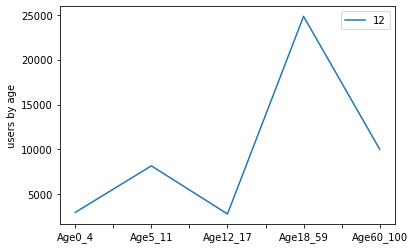

In [14]:
total= Librarydata[12:13][['Age0_4','Age5_11','Age12_17','Age18_59','Age60_100']]
total.T.plot()
plt.ylabel('users by age')


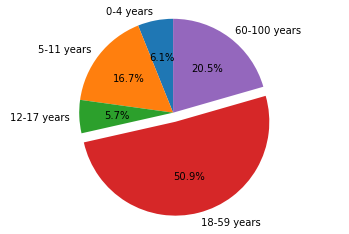

In [15]:
labels = '0-4 years', '5-11 years', '12-17 years', '18-59 years', '60-100 years'
total = [2966, 8164, 2787, 24843, 10023]
explode = (0, 0, 0, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(total, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  

plt.show()

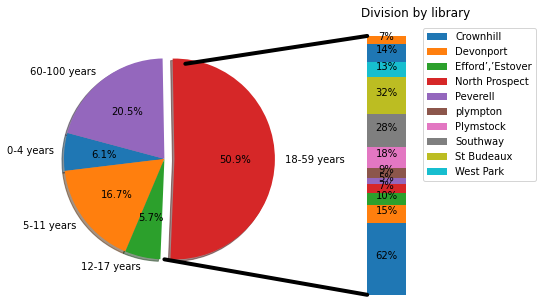

In [16]:
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

labels = '0-4 years', '5-11 years', '12-17 years', '18-59 years', '60-100 years'
total = [2966, 8164, 2787, 24843, 10023]
explode = [0, 0, 0, 0.1, 0]


angle = -185 * total[3]
ax1.pie(total, autopct='%1.1f%%', shadow= True, startangle=angle,
        labels=labels, explode=explode)



xpos = 0
bottom = 0
individual_library = [0.31,0.077,0.054,0.036,0.026,0.045,0.091,0.14,0.16,0.066,0.075,0.036]
width = .2


for j in range(len(individual_library)):
    height = individual_library[j]
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 200),
             ha='center')
ax2.set_title('Division by library')
ax2.legend(('Crownhill', 'Devonport','Efford’,’Estover', 'North Prospect','Peverell','plympton','Plymstock','Southway','St Budeaux','West Park'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 4.0 * width)

theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])


x = r * np.cos(np.pi / 99 * theta2) + center[0]
y = np.sin(np.pi / 210 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)


x = r * np.cos(np.pi / 10 * theta1) + center[0]
y = np.sin(np.pi / 30 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.show()

Library
Central           AxesSubplot(0.125,0.125;0.775x0.755)
Crownhill         AxesSubplot(0.125,0.125;0.775x0.755)
Devonport         AxesSubplot(0.125,0.125;0.775x0.755)
Efford            AxesSubplot(0.125,0.125;0.775x0.755)
Estover           AxesSubplot(0.125,0.125;0.775x0.755)
North Prospect    AxesSubplot(0.125,0.125;0.775x0.755)
Peverell          AxesSubplot(0.125,0.125;0.775x0.755)
Plympton          AxesSubplot(0.125,0.125;0.775x0.755)
Plymstock         AxesSubplot(0.125,0.125;0.775x0.755)
Southway          AxesSubplot(0.125,0.125;0.775x0.755)
St Budeaux        AxesSubplot(0.125,0.125;0.775x0.755)
West Park         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

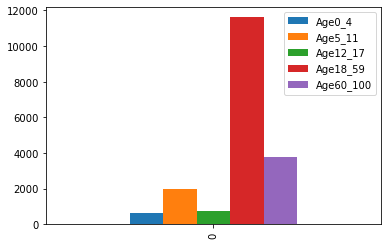

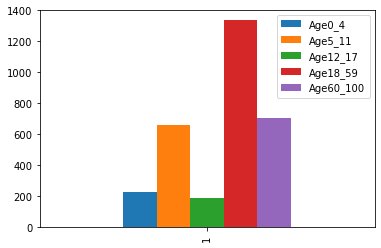

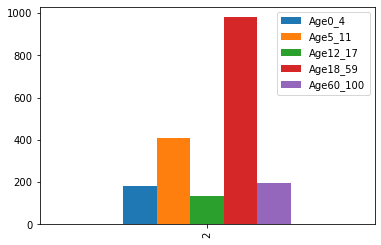

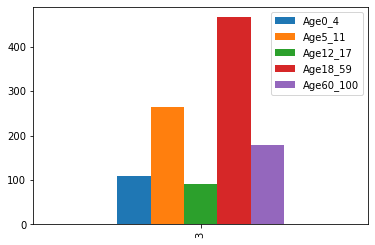

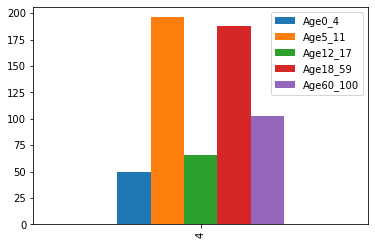

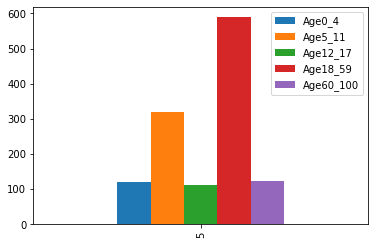

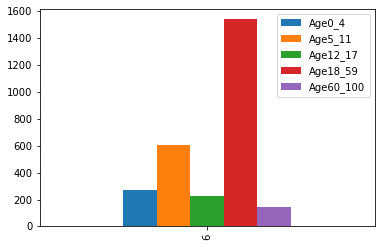

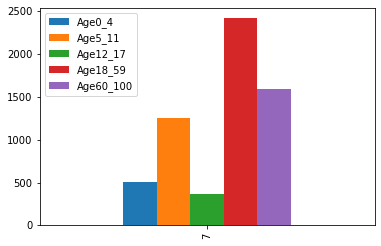

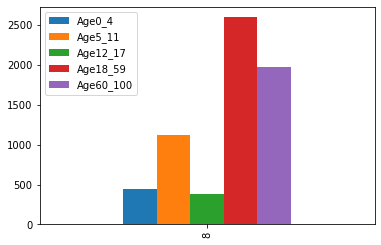

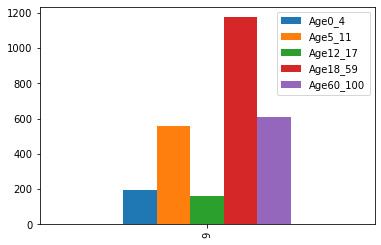

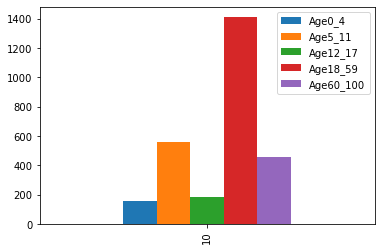

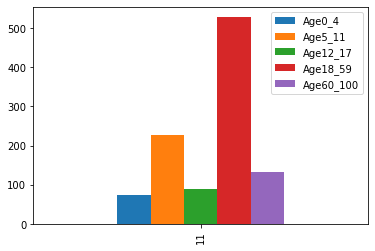

In [17]:
libdata = pd.read_csv('Downloads/librarydata.csv', sep=',', usecols= ['Library','Age0_4', 'Age5_11', 'Age12_17', 'Age18_59', 'Age60_100'])
lib = libdata.groupby('Library')
lib.plot(kind='bar')